# Pima Indians Diabetes

Diabetes mellitus, or simply diabetes, is the world's leading noncommunicable disease (NCD), with cases nearly doubling since 1980. It is a chronic disease that occurs when the pancreas fails to produce enough insulin or when the body fails to properly utilise the insulin produced. This disease has no known cure. Diabetes is believed to be caused by a combination of genetic and environmental factors. Diabetes risk factors include ethnicity, a family history of diabetes, age, excess weight, an unhealthy diet, physical inactivity, and smoking. Furthermore, the failure to detect diabetes early has been linked to the development of other chronic diseases such as kidney disease. Furthermore, pre-existing noncommunicable diseases pose a high risk for the patient because they are easily contracted and susceptible to infectious diseases like COVID-19.

Predicting an individual's risk and susceptibility to a chronic illness like diabetes is a difficult task. Diagnosing chronic illness early saves money on medical bills and lowers the risk of more serious health problems. Even in high-risk situations where a patient is unconscious or unintelligible, it is critical that accurate deductions can be made from immediately measurable medical indicators to help clinicians make better decisions for patient treatment.

The majority of existing NCD cases go undiagnosed, with patients experiencing few symptoms in the early stages of the disease, posing a significant challenge in ensuring early detection and diagnosis. One advantage of treating patients early in their experience with noncommunicable diseases is that they can avoid costly treatments later in life as the disease worsens. This is exacerbated by a shortage of medical practitioners in underserved areas such as rural and remote villages. In such cases, a combination of the Internet of Medical Things (IoMT) and machine learning models can be made available to help healthcare professionals detect and diagnose NCDs earlier by providing predictive tools for more efficient and timely decision-making.

This experiment makes use of the Pima Indian Diabetes dataset. The Pima Indians are a Native American tribe found in Mexico and Arizona, USA. Diabetes mellitus was found to be prevalent in this population. As a result, they were thought to be important to and representative of global health research. The Pima Indian Diabetes dataset, which includes Pima Indian females aged 21 and up, is a popular benchmark dataset. This organisation is also important to members of underrepresented minority and indigenous groups.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8943493/

# About Pima Indian Diabetes Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

### METADATA

Preg - Pregnant
> Number of times pregnant

Gluc - Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT) 
> Values from 100mg/dl to 126 mg/dl are diagnostic of pre-diabetes. Fasting plasma glucose levels equal or above 126 mg/dl are diagnostic of diabetes. Two hours after the glucose drink your plasma glucose normally is less than 140 mg/dl. Values from 140mg/dl to 199 mg/dl indicate that you have pre-diabetes.

BP - Diastolic Blood Pressure (mm Hg)	
>  A normal diastolic blood pressure is less than 80 mmHg

Skin - Triceps skin fold thickness (mm)	
> In the study population, the average TSF thickness was 18.7 ± 8.5 mm. Women have much higher TSF thickness than men (23.6 ± 7.5 mm vs 14.3 ± 6.8 mm)

Insulin - 2-Hour Serum insulin (µh/ml)	
> Optimal Result: 2.6 - 24.9 uIU/ml

BMI - Body mass index (weight in kg/(Height in m)^2)
> BMI for women normal range 18.5–24.9

DPF - Diabetes pedigree function	
> Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age - Age (years)
> For this dataset; age is at least 21 years old

Outcome - Binary value indicating non-diabetic /diabetic	

# OSEMN DATA SCIENCE WORKFLOW

To dissect this dataset, the OSEMN method will be the guide.

O — Obtaining Data
> Obtaining data can be performed in a variety of ways. Depending on what company you are working for they may provide the data for you, if not you will most likely need to web scrape, use an API, or be familiar with SQL. Once the data is obtained, it is important to take a look at what you have acquired and become familiar with your dataset,

S — Scrub Data
> Scrubbing data is one of the most time consuming aspects of a data scientist’s career. However, it is crucial to get the data into a format that is easier to use. Within most obtained data there will be something missing or wrong with it. Common items to look out for are null values, abnormal numbers, symbols, or data types that must be converted. When identifying nulls it is essential to decide how you are going to handle them.

E - Explore
> Explore is where the data scientist will perform their EDA (Exploratory Data Analysis), which is another way of saying the data scientist will make visualizations to better understand the data before modeling. Visualizations included in the explore step are often distplots, kernel density estimates, scatterplots, and qqplots (must create OLS Regression before creating QQPlot). The data scientist should be checking for linearity during the Explore step. Often times Scrub and Explore overlap in the OSEMN process. It is in this step that numpy, seaborn, pandas, and scipy come in handy.

M - Model
> There are many different ways to model depending on what the task is you are trying to solve. In this blog post I will model Linear Regression using inference or prediction. Inference is asking “How does X affect Y?” Whereas prediction asks “How can I use X to predict Y?” There will probably be many model’s completed during your work flow, but this is where your final model should be placed. 

N - iNterpret
> Here you will interpret your final model and identify 3+ actionable insights to give as recommendations based off of the data set.

Source: https://medium.com/analytics-vidhya/osemn-is-awesome-3c9e42c3067d

In [1]:
# Importing packages (1)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

sns.set_style("whitegrid")

# OBTAINING DATA

In [2]:
#obtaining the first five rows of the dataset
df = pd.read_csv("C:/Users/User/Desktop/diabetes.csv")
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# SCRUBBING (CLEANING) DATA

In [3]:
#obtain the shape the dataframe in form of (row numbers, column numbers)
df.shape 

(768, 9)

In [4]:
#obtain the number of null values and data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> Observation : No null value

In [5]:
#summary statistics of the dataframe
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Observations (compared with metadata):
> Glucose value can range from 100mg/dL to 199mg/dL. A minimum value of 0 mg/dL requires alteration.

> BloodPressure value (Diastolic) can have a value less or equal to 80 mmHg. A minimum value of 0 mmHg requires alteration.

> SkinThickness value in women is at 23.6 ± 7.5 mm. A minimum value of 0 mm requires alteration.

> Insulin value for women range is 2.6 - 24.9 uIU/ml.  A minimum value of 0 rquired alteration.

> BMI (Body Mass Index) value of women normal range 18.5–24.9 kg/m². A minimum value of 0 kg/m² requires alteration. 

In [6]:
# replace 0 with the NaN in the indicated columns of the dataframe.
df[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


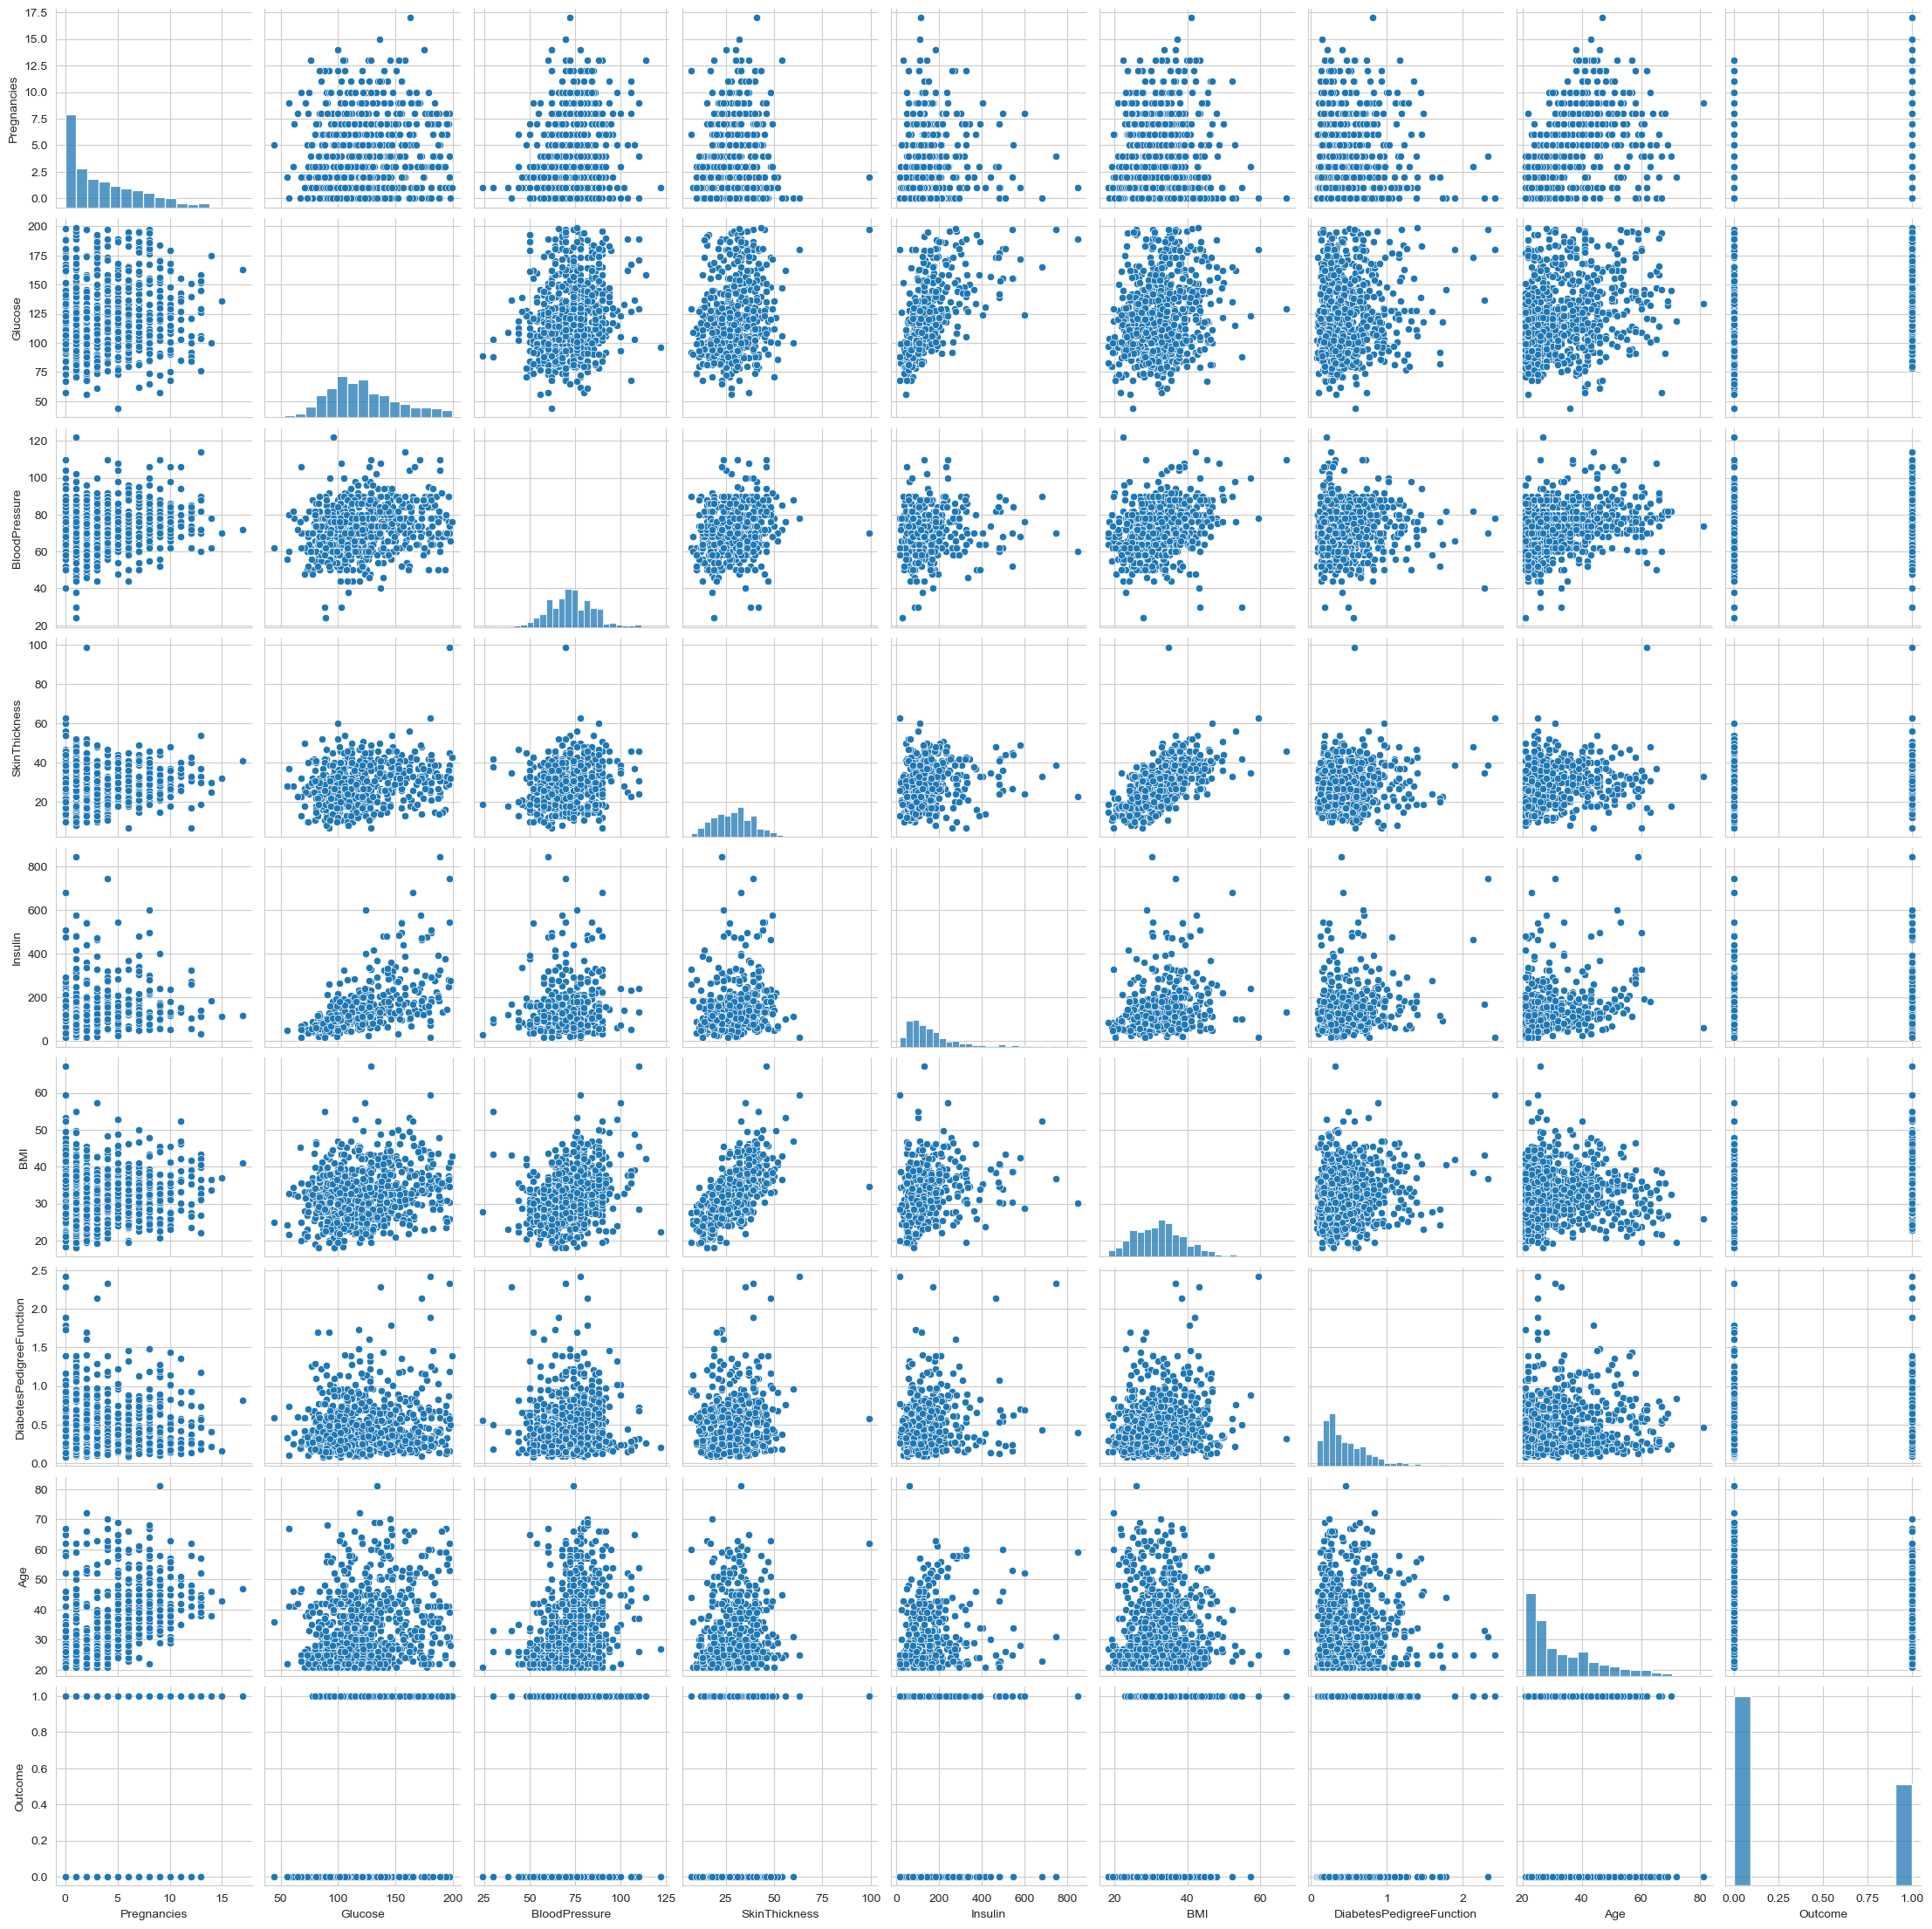

In [7]:
# Visualizing the distribution and correlation of the columnns using a pairplot
sns.pairplot(df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
plt.show()

In [8]:
# Identifying the number of missing values of the update df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
# aggregating the sum of missing values 
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# filling missing values with mean or median
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

df['Insulin'].fillna(df.groupby('Glucose')['Insulin'].transform('median'), inplace = True)

df['BMI'].fillna(df['BMI'].median(), inplace = True)

df['SkinThickness'].fillna(df.groupby('BMI')['SkinThickness'].transform('mean'), inplace = True)

**Method of filling**

> Columns with missing values, which follow the the normal distribution are filled with mean

> Columns with missing values and are skewed, are filled with median after being grouped by columns that may affect them. Example: SkinThickness is filled based on BMI grouping because the weight component of BMI influences the SkinThickness

**Skewness**

>A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

>A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

source: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [11]:
# aggregating the sum of meaning values 
df.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               32
Insulin                     32
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

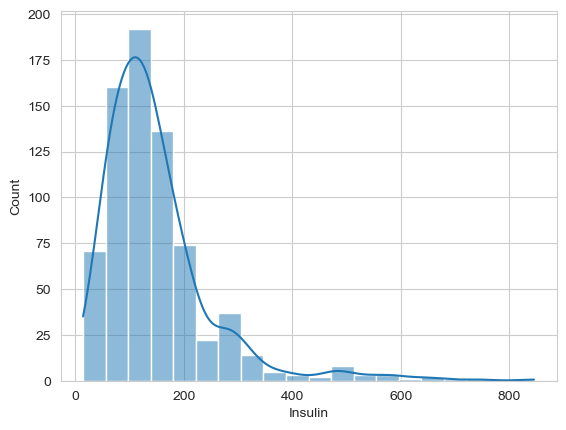

In [12]:
# visualizing the distribtuion of the Insulin level column
sns.histplot(df['Insulin'], kde = True, alpha = 0.5, bins = 20)
plt.show()

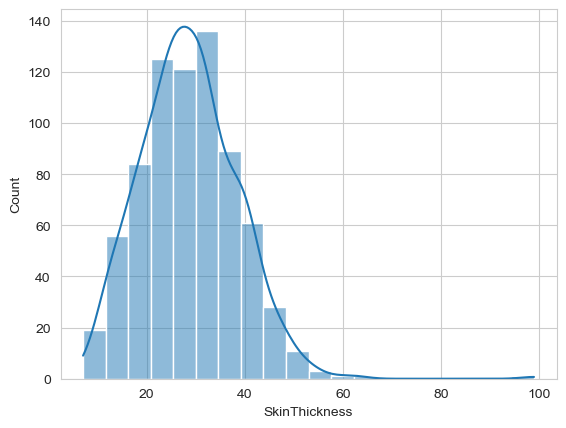

In [13]:
# visualizing the distribtuion of the SkinThickness column
sns.histplot(df['SkinThickness'], kde = True, alpha = .5,bins = 20)
plt.show()

In [14]:
# Filling the Insulin column with median value
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

In [15]:
# Filling the SkinThickness column with the mean value
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)

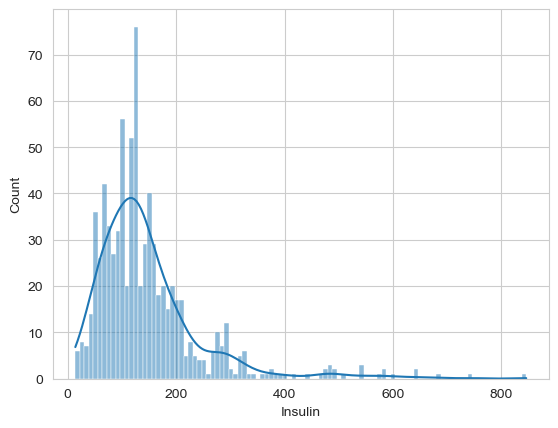

In [16]:
# Observing the distribution of the Insulin column
sns.histplot(df['Insulin'], kde = True, alpha = 0.5, bins = 100)
plt.show()

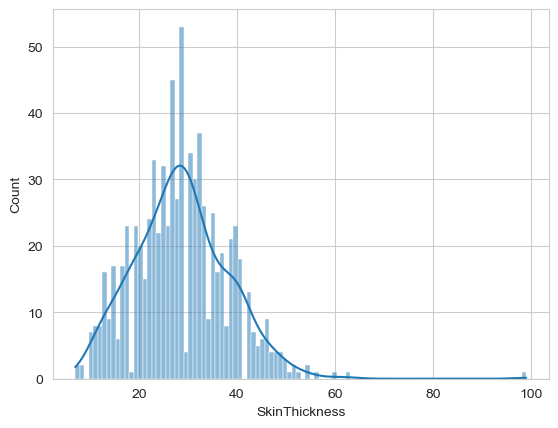

In [17]:
# Observing the distribution of the SkinThickness column
sns.histplot(df['SkinThickness'], kde = True, alpha = 0.5, bins = 100)
plt.show()

In [18]:
# Observing the number of meaning value of the cleaned data 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,277.5,33.6,0.627,50,1
1,1,85.0,66.000000,29.000000,49.0,26.6,0.351,31,0
2,8,183.0,64.000000,28.614922,126.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.000000,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,19.000000,105.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.000000,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,40.000000,118.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.000000,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,25.000000,121.0,32.3,0.232,54,1


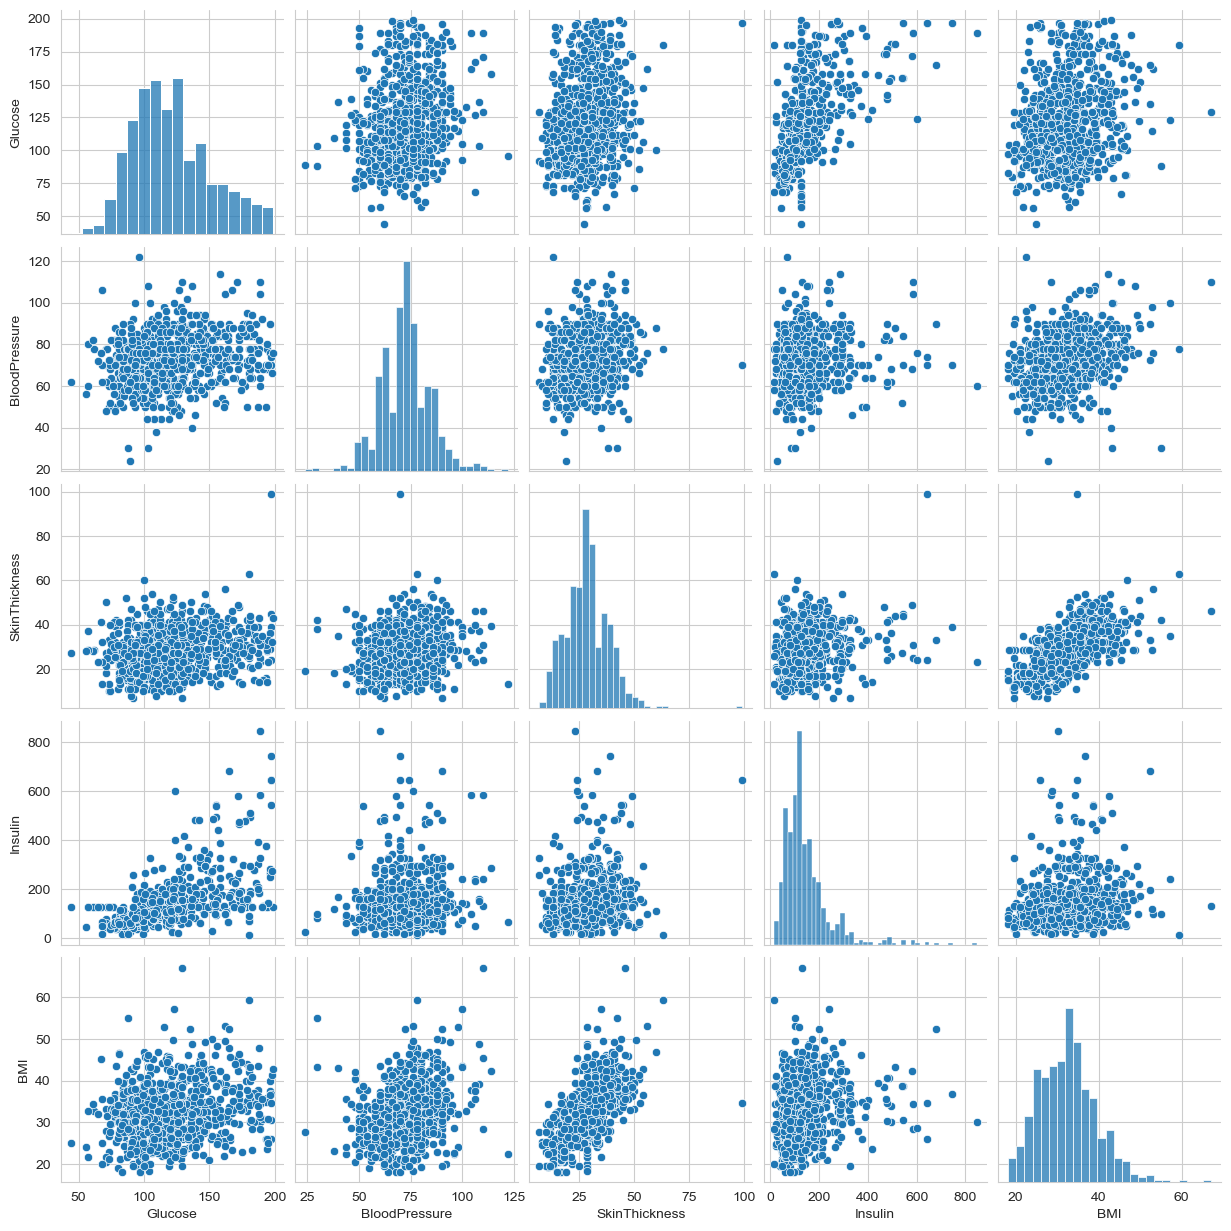

In [20]:
# visualizing the new distribution and correlation of the filled sample dataset
sns.pairplot(df[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']])
plt.show()

In [21]:
# checking for duplicates 
df.duplicated().sum()

0

> **CHECKING FOR OUTLIERS**

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


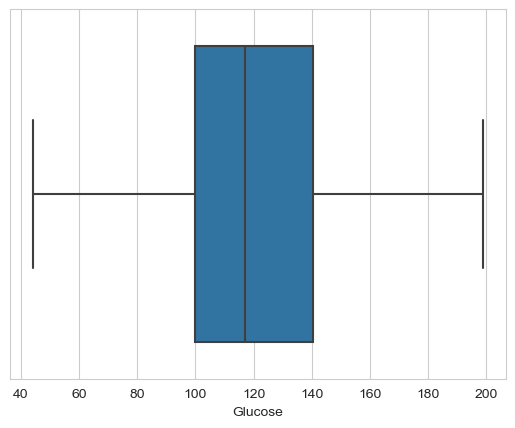

In [22]:
# checking for outliers on the glucose column
sns.boxplot(df['Glucose'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


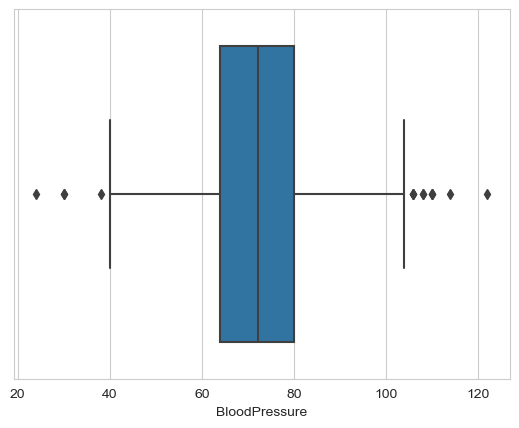

In [23]:
sns.boxplot(df['BloodPressure'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


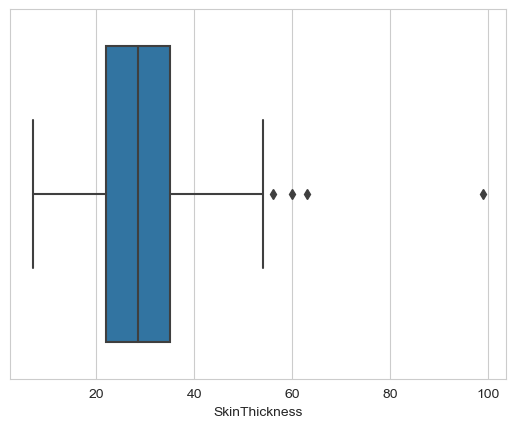

In [24]:
# checking for outliers on the SkinThickness column
sns.boxplot(df['SkinThickness'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


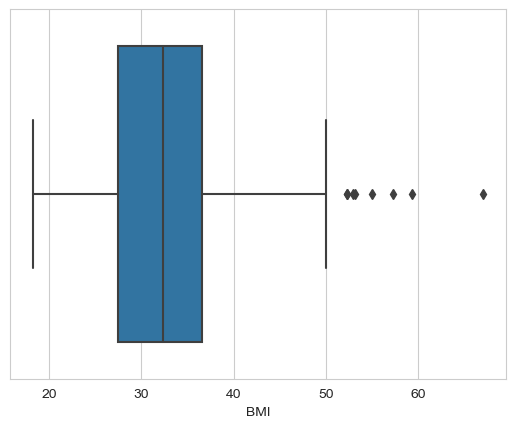

In [25]:
# checking for outliers on the BMI column
sns.boxplot(df['BMI'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


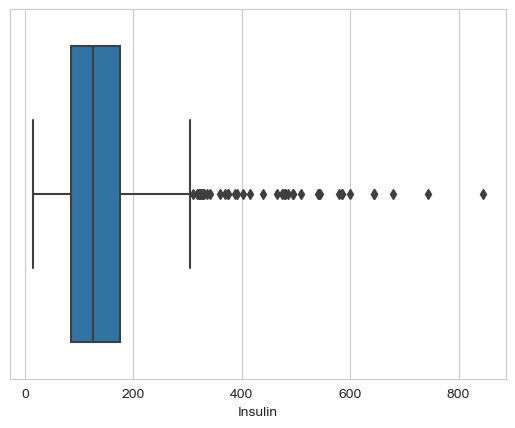

In [26]:
# checking for outliers on the Insulin column
sns.boxplot(df['Insulin'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


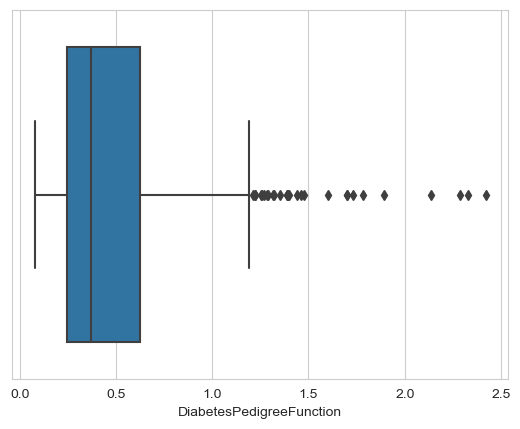

In [27]:
# checking for outliers on the DiabetesPedigreeFunction column
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

> **CHECKING FOR OUTLIERS PERCENTAGE**

In [28]:
#define a function to determine the percentage of outliers
def upper_outliers(col):
    IQR = np.quantile(df[col], 0.75) - np.quantile(df[col], 0.25)
    decimal = len(df[df[col] > (np.quantile(df[col], 0.75)+1.5*IQR)].index) / len(df[col])
    percentage = decimal * 100
    print(f'percentage of {col} that are upper outliers: {np.round(percentage, decimals = 2)}%')
    
def lower_outliers(col):
    IQR = np.quantile(df[col], 0.75) - np.quantile(df[col], 0.25)
    decimal = len(df[df[col] < (np.quantile(df[col], 0.25)-1.5*IQR)].index) / len(df[col])
    percentage = decimal * 100
    print(f'percentage of {col} that are lower outliers: {np.round(percentage, decimals = 2)}%')

In [29]:
# Outliers in the Glucose column
upper_outliers('Glucose')
lower_outliers('Glucose')

percentage of Glucose that are upper outliers: 0.0%
percentage of Glucose that are lower outliers: 0.0%


In [30]:
# Outliers in the BloodPressure column
upper_outliers('BloodPressure')
lower_outliers('BloodPressure')

percentage of BloodPressure that are upper outliers: 1.3%
percentage of BloodPressure that are lower outliers: 0.52%


In [31]:
# Outliers in the SkinThickness column
upper_outliers('SkinThickness')
lower_outliers('SkinThickness')

percentage of SkinThickness that are upper outliers: 0.52%
percentage of SkinThickness that are lower outliers: 0.0%


In [32]:
# Outliers in the BMI column
upper_outliers('BMI')
lower_outliers('BMI')

percentage of BMI that are upper outliers: 1.04%
percentage of BMI that are lower outliers: 0.0%


In [33]:
# Outliers in the Insulin column
upper_outliers('Insulin')
lower_outliers('Insulin')

percentage of Insulin that are upper outliers: 5.73%
percentage of Insulin that are lower outliers: 0.0%


In [34]:
# Outliers in the DiabetesPedigreeFunction column
upper_outliers('DiabetesPedigreeFunction')
lower_outliers('DiabetesPedigreeFunction')

percentage of DiabetesPedigreeFunction that are upper outliers: 3.78%
percentage of DiabetesPedigreeFunction that are lower outliers: 0.0%


> **REMOVING OUTLIERS**

In [35]:
#define a function to remove the outliers
def drop_upper_outliers(df, col):
    IQR = 1.5 * (np.percentile(df[col], 75) - np.percentile(df[col], 25))
    return df.drop(df[df[col] > (IQR + np.percentile(df[col], 75))].index, inplace=True)
    
def drop_lower_outliers(df, col):
    IQR = 1.5 * (np.percentile(df[col], 75) - np.percentile(df[col], 25))
    return df.drop(df[df[col] < (np.percentile(df[col], 25) - IQR)].index, inplace=True)

**REMOVING THE OUTLIERS OF GLUCOSE COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [212]:
drop_upper_outliers(df, 'Glucose')

In [213]:
drop_lower_outliers(df, 'Glucose')

In [214]:
upper_outliers('Glucose')
lower_outliers('Glucose')

percentage of Glucose that are upper outliers: 0.0%
percentage of Glucose that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


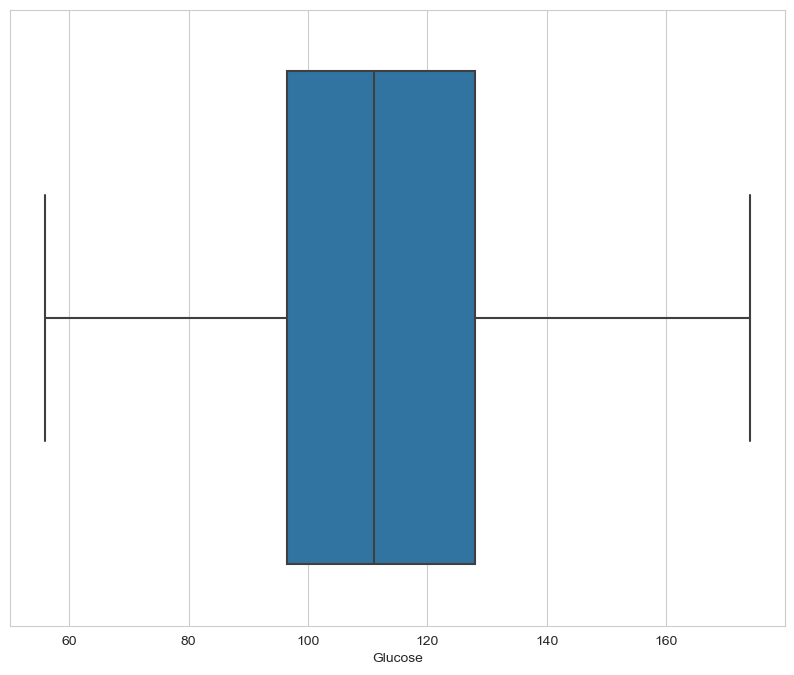

In [215]:
sns.boxplot(df['Glucose'])
plt.show()

**REMOVING THE OUTLIERS OF BLOODPRESSURE COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [216]:
drop_upper_outliers(df, 'BloodPressure')

In [217]:
drop_lower_outliers(df, 'BloodPressure')

In [218]:
upper_outliers('BloodPressure')
lower_outliers('BloodPressure')

percentage of BloodPressure that are upper outliers: 0.0%
percentage of BloodPressure that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


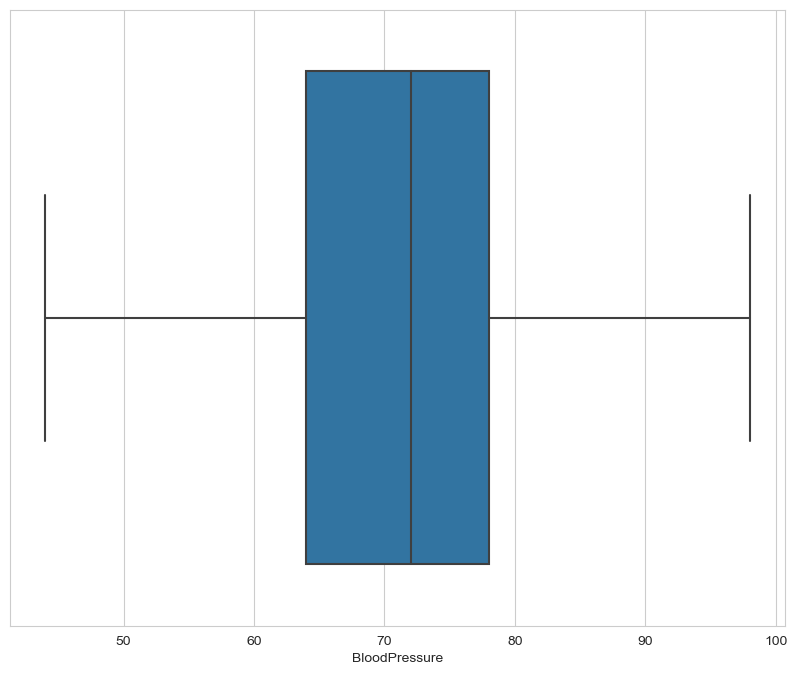

In [219]:
sns.boxplot(df['BloodPressure'])
plt.show()

**REMOVING THE OUTLIERS OF INSULIN COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [220]:
drop_upper_outliers(df, 'Insulin')

In [221]:
drop_lower_outliers(df, 'Insulin')

In [222]:
upper_outliers('Insulin')
lower_outliers('Insulin')

percentage of Insulin that are upper outliers: 0.0%
percentage of Insulin that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


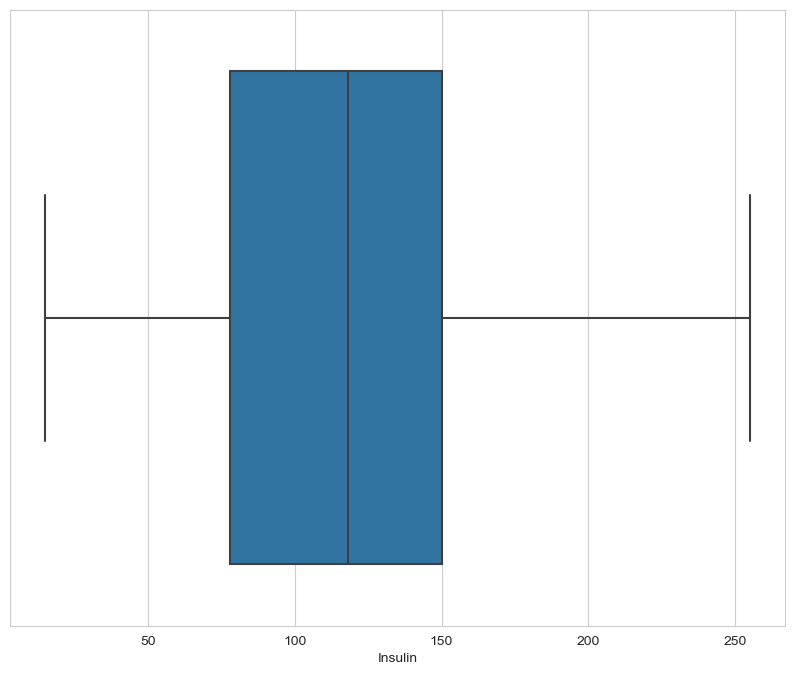

In [223]:
sns.boxplot(df['Insulin'])
plt.show()

**REMOVING THE OUTLIERS OF BMI COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [224]:
drop_upper_outliers(df, 'BMI')

In [225]:
drop_lower_outliers(df, 'BMI')

In [226]:
upper_outliers('BMI')
lower_outliers('BMI')

percentage of BMI that are upper outliers: 0.0%
percentage of BMI that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


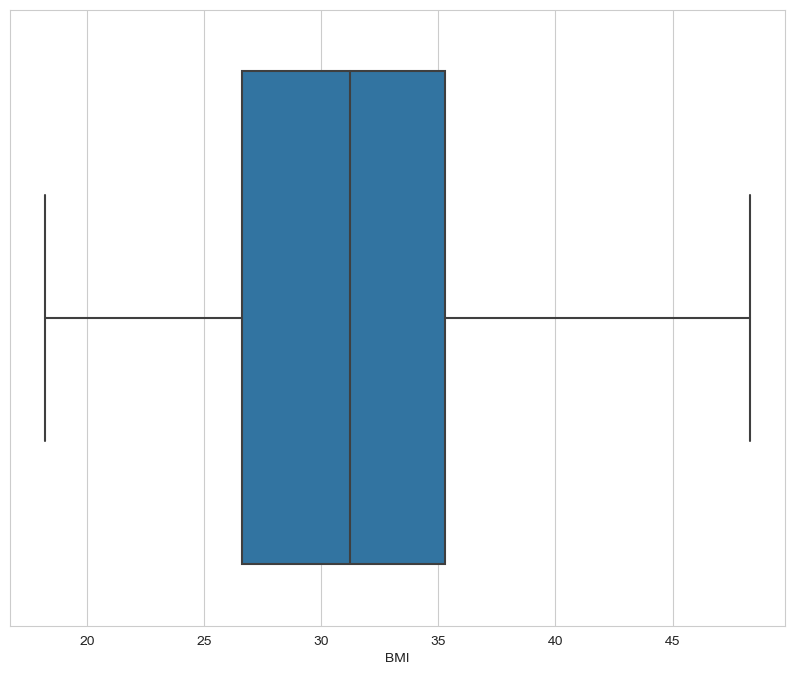

In [227]:
sns.boxplot(df['BMI'])
plt.show()

**REMOVING THE OUTLIERS OF SKINTHICKNESS COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [228]:
drop_upper_outliers(df, 'SkinThickness')

In [229]:
drop_lower_outliers(df, 'SkinThickness')

In [230]:
upper_outliers('SkinThickness')
lower_outliers('SkinThickness')

percentage of SkinThickness that are upper outliers: 0.0%
percentage of SkinThickness that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


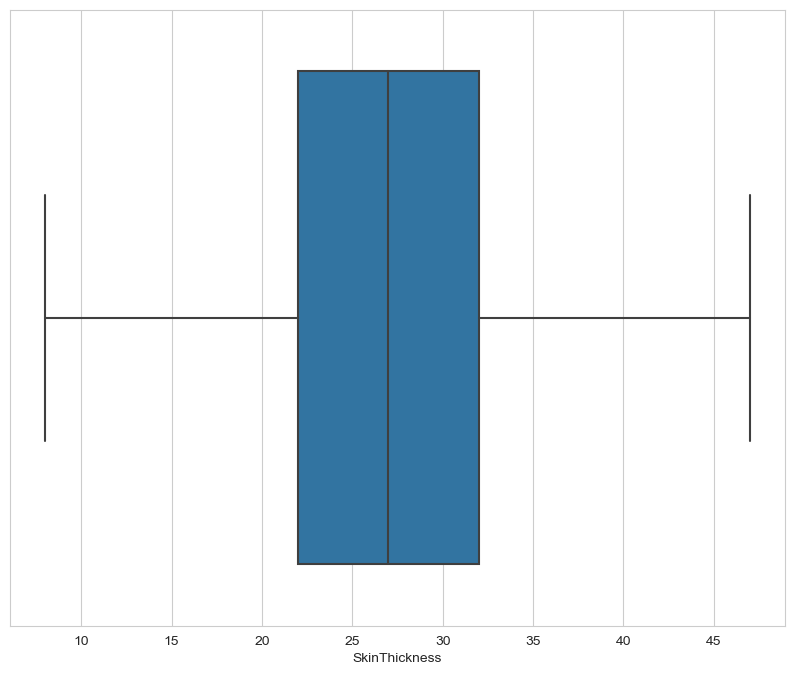

In [231]:
sns.boxplot(df['SkinThickness'])
plt.show()

**REMOVING THE OUTLIERS OF DIABETESPEDIGREEFUNCTION COLUMN, RECHECKING THE PERCENTAGE OF OUTLIERS IN THE NEW DATASET AND A OBSERVING THE BOXPLOT FOR OUTLIERS**

In [232]:
drop_upper_outliers(df, 'DiabetesPedigreeFunction')

In [233]:
drop_lower_outliers(df, 'DiabetesPedigreeFunction')

In [234]:
upper_outliers('DiabetesPedigreeFunction')
lower_outliers('DiabetesPedigreeFunction')

percentage of DiabetesPedigreeFunction that are upper outliers: 0.0%
percentage of DiabetesPedigreeFunction that are lower outliers: 0.0%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


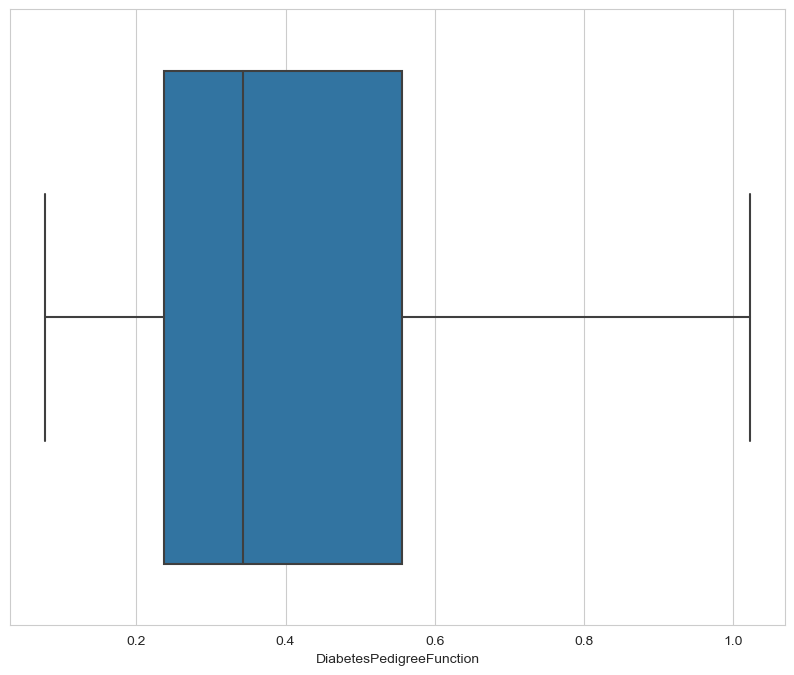

In [235]:
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

### GENERAL OBSERVATION OF THE ALTERED COLUMNS

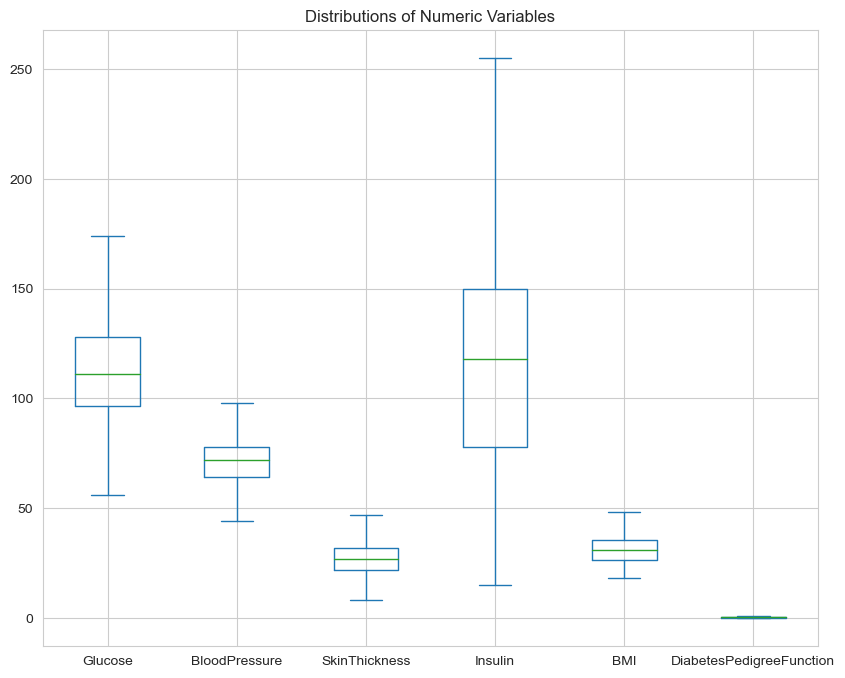

In [236]:
# Adjusting the size of the chart
plt.rcParams['figure.figsize'] = [10, 8]

# Ploting the columns 
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].plot(kind='box')

# Naming the title of the chart
plt.title("Distributions of Numeric Variables")

# Showing the chart
plt.show()

In [237]:
#Observing the cleaned dataset
df.shape

(583, 12)

In [238]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group,BMI category,Glucose category
1,1,85.0,66.000000,29.0,49.0,26.6,0.351,31,0,40 years and younger,Overweight,normal
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0,40 years and younger,Overweight,normal
5,5,116.0,74.000000,19.0,105.0,25.6,0.201,30,0,40 years and younger,Overweight,hyperglycemia
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1,40 years and younger,Obese,normal
7,10,115.0,72.405184,40.0,118.0,35.3,0.134,29,0,40 years and younger,Obese,hyperglycemia


# EXPLORING DATA

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,583.0,3.753002,3.300118,0.000,1.000,3.000,6.0000,17.000
Glucose,583.0,113.498171,23.712105,56.000,96.500,111.000,128.0000,174.000
BloodPressure,583.0,71.182780,10.446125,44.000,64.000,72.000,78.0000,98.000
SkinThickness,583.0,27.334965,8.416705,8.000,22.000,27.000,32.0000,47.000
Insulin,583.0,117.883362,49.839925,15.000,78.000,118.000,150.0000,255.000
BMI,583.0,31.317667,6.184626,18.200,26.600,31.200,35.3000,48.300
DiabetesPedigreeFunction,583.0,0.406084,0.221602,0.078,0.237,0.343,0.5555,1.022
Age,583.0,32.228130,11.380687,21.000,24.000,28.000,39.0000,81.000
Outcome,583.0,0.267581,0.443078,0.000,0.000,0.000,1.0000,1.000


In [240]:
# Adding a new column of age category for the EDA

df.loc[(df['Age'] <= 40), 'age_group'] = '40 years and younger'
df.loc[(df['Age'] > 40)&(df['Age'] < 60), 'age_group'] = 'between 40 and 60 years'
df.loc[(df['Age'] >= 60), 'age_group'] = '60 years and older'

### **1. What is the number of the subject that are diabetic or non-diabetic**

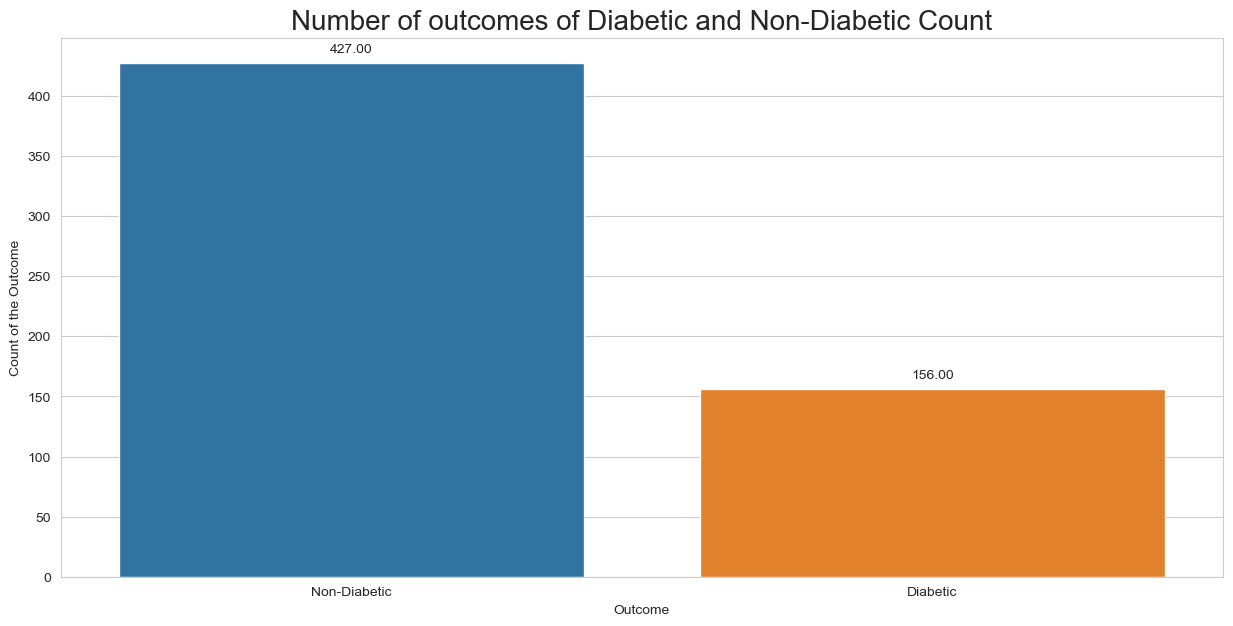

In [241]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (15, 7))

# Plotting the graph using the count plot from seaborn
ax = sns.countplot(data = df, x ='Outcome')

# Using a for loop to input the annotations at the top of the bar of the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Redefining the labels
new_labels = ['Non-Diabetic', 'Diabetic']

# Setting the labels on the x-axis tick
ax.set_xticklabels(new_labels)

# Naming the y axis
plt.ylabel('Count of the Outcome')

# Add a title to the pie chart
plt.title('Number of outcomes of Diabetic and Non-Diabetic Count', fontsize = 20)

# Display the pie chart
plt.show()

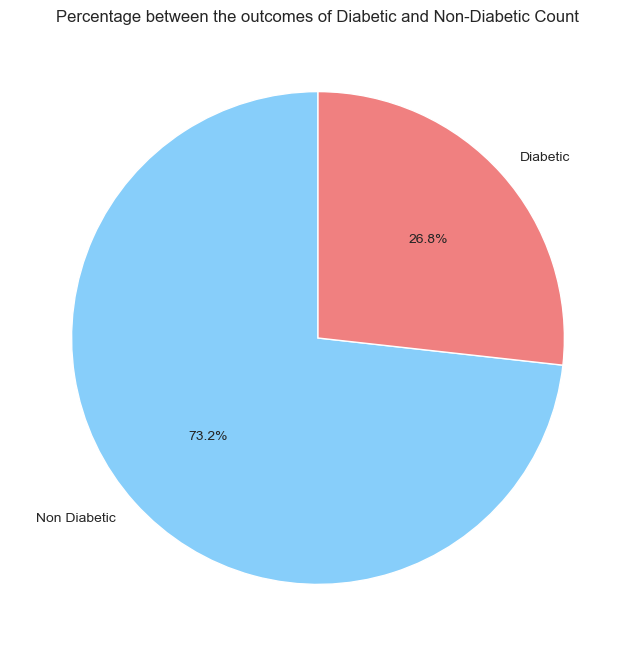

In [242]:
# Define the data for the pie chart
sizes = [len(df[df['Outcome'] == 0]), len(df[df['Outcome'] == 1])]

# Labels for each outcome
labels = ['Non Diabetic', 'Diabetic']  

# Define the colors for the pie chart
colors = ['lightskyblue', 'lightcoral']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage between the outcomes of Diabetic and Non-Diabetic Count')

# Display the pie chart
plt.show()

### **2. What is the numbers of the different BMI categories**

In [243]:
# Define the BMI categories and their corresponding BMI ranges
bmi_categories = {'Underweight': (0, 18.5),
                  'Healthy weight': (18.5, 25),
                  'Overweight': (25, 30),
                  'Obese': (30, 40),
                  'Severe obesity': (35, 100)}

# Apply the mapping function to the BMI column using lambda
df['BMI category'] = df['BMI'].apply(lambda x: next((category for category, (min_bmi, max_bmi) in bmi_categories.items() if min_bmi <= x < max_bmi), 'Unknown'))

# Display the updated DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group,BMI category,Glucose category
1,1,85.0,66.000000,29.0,49.0,26.6,0.351,31,0,40 years and younger,Overweight,normal
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0,40 years and younger,Overweight,normal
5,5,116.0,74.000000,19.0,105.0,25.6,0.201,30,0,40 years and younger,Overweight,hyperglycemia
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1,40 years and younger,Obese,normal
7,10,115.0,72.405184,40.0,118.0,35.3,0.134,29,0,40 years and younger,Obese,hyperglycemia


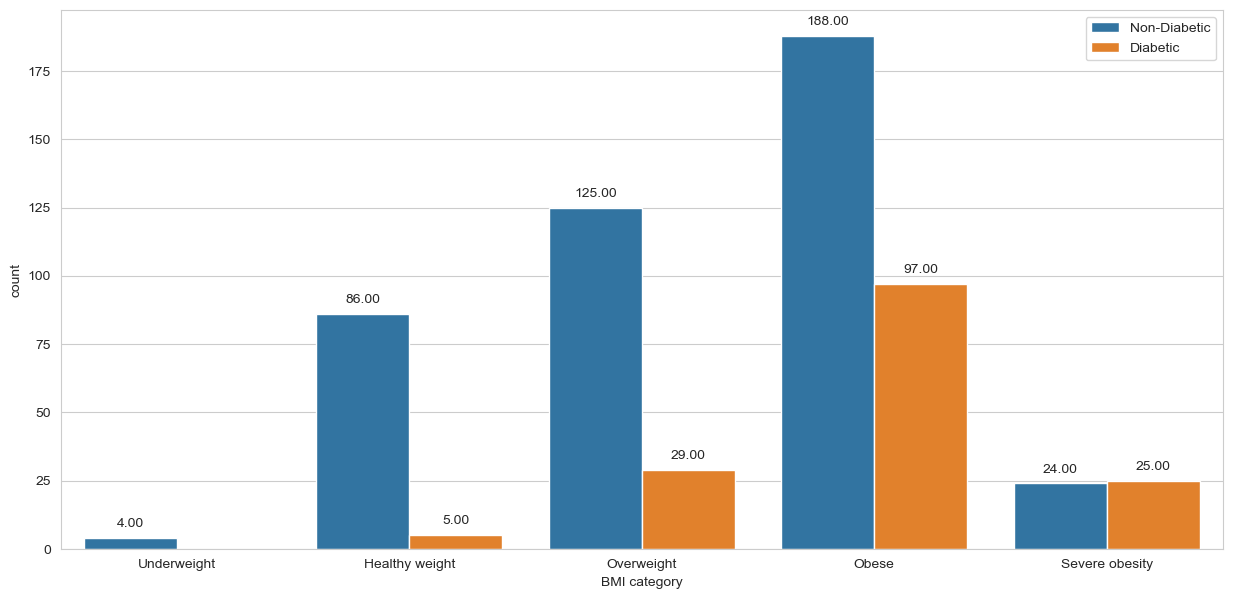

In [244]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (15, 7))

# Plotting the graph using the count plot from seaborn
ax = sns.countplot(data = df, x ='BMI category', order = ['Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severe obesity'], hue = 'Outcome')

# Using a for loop to input the annotations at the top of the bar of the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Inputting the legends
plt.legend(['Non-Diabetic', 'Diabetic'])

# Display the count chart
plt.show()

### **3. What is the numbers of pregnancies by age group**

In [245]:
# Creating a dataframe for age group and count of number of pregnancies
age_preg = df.groupby('age_group').agg({'Pregnancies':'count'}).reset_index('age_group')

# Adding the Age Group
age_preg['Age Group'] = age_preg['age_group']

# Dropping the 'age_group'
age_preg.drop('age_group', axis = 1, inplace = True)

# Displaying the age_preg dataframe
age_preg

,Pregnancies,Age Group
0,454,40 years and younger
1,21,60 years and older
2,108,between 40 and 60 years


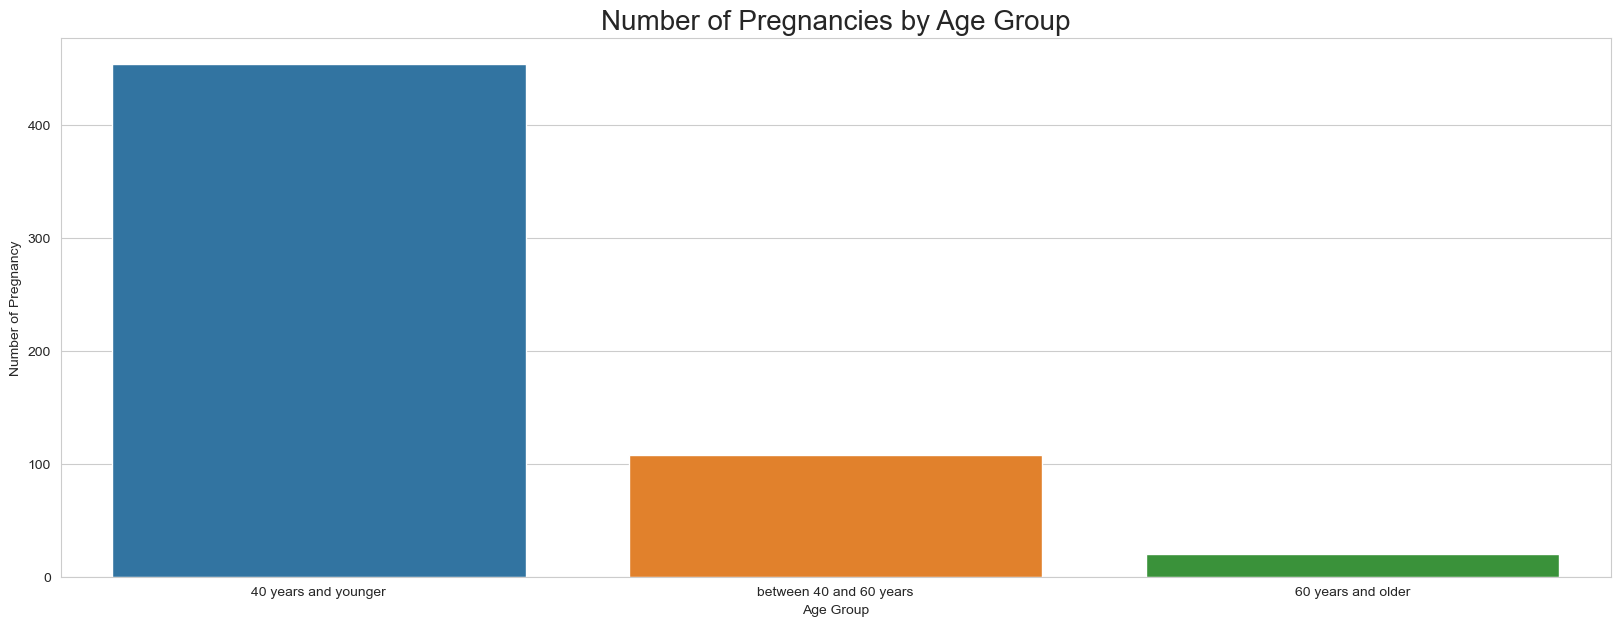

In [246]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (20, 7))

# Plotting the graph using the bar plot from seaborn
sns.barplot(data = age_preg, x = 'Age Group', y = 'Pregnancies', ci = 0, order = ['40 years and younger','between 40 and 60 years','60 years and older'])

# Naming the y axis
plt.ylabel('Number of Pregnancy')

# Adding title
plt.title('Number of Pregnancies by Age Group', fontsize = 20)

# Display the bar chart
plt.show()

### **4. What is the relationship between the blood glucose level and insulin concentration**

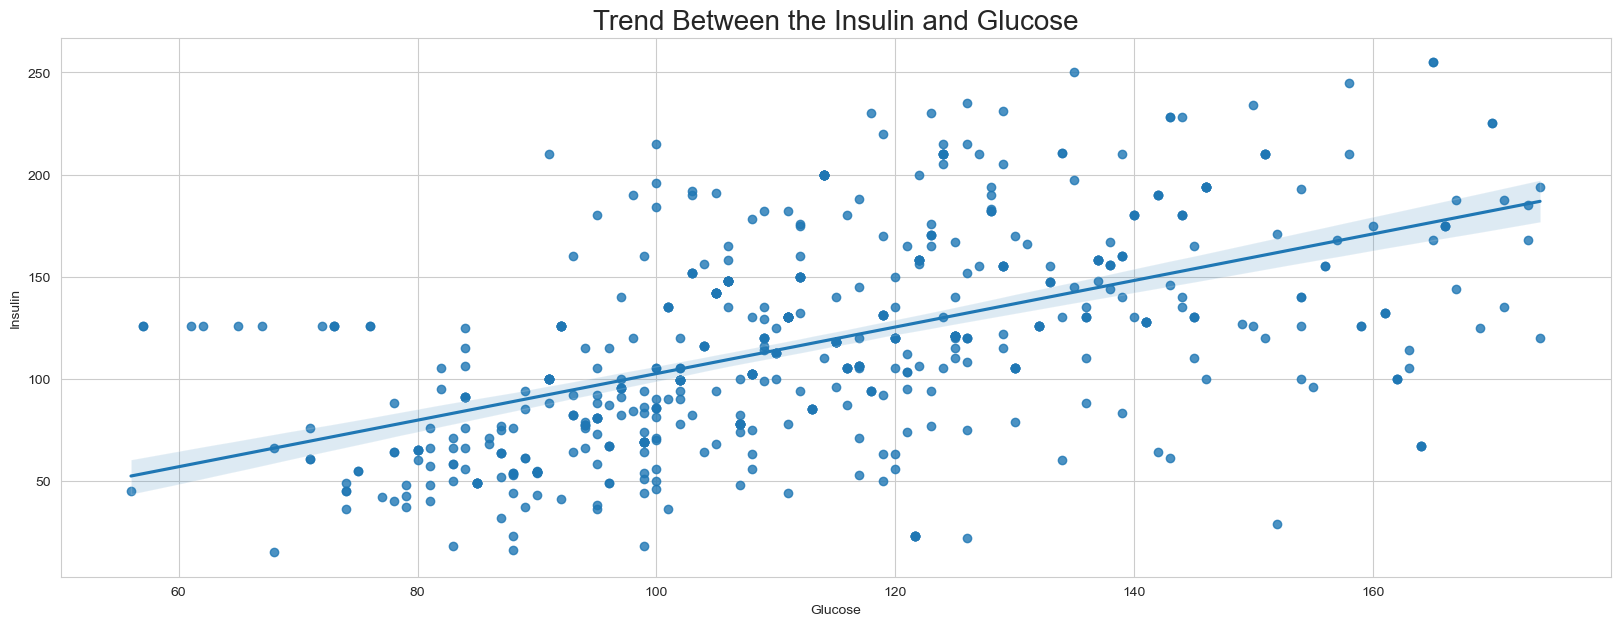

In [247]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (20, 7))

# Plotting the graph using the regression plot from seaborn
sns.regplot(data = df, x = 'Glucose', y = 'Insulin')

# Adding title
plt.title('Trend Between the Insulin and Glucose', fontsize = 20)

# Display the count chart
plt.show()

### **5. What is the number of subject based on BMI Categories**

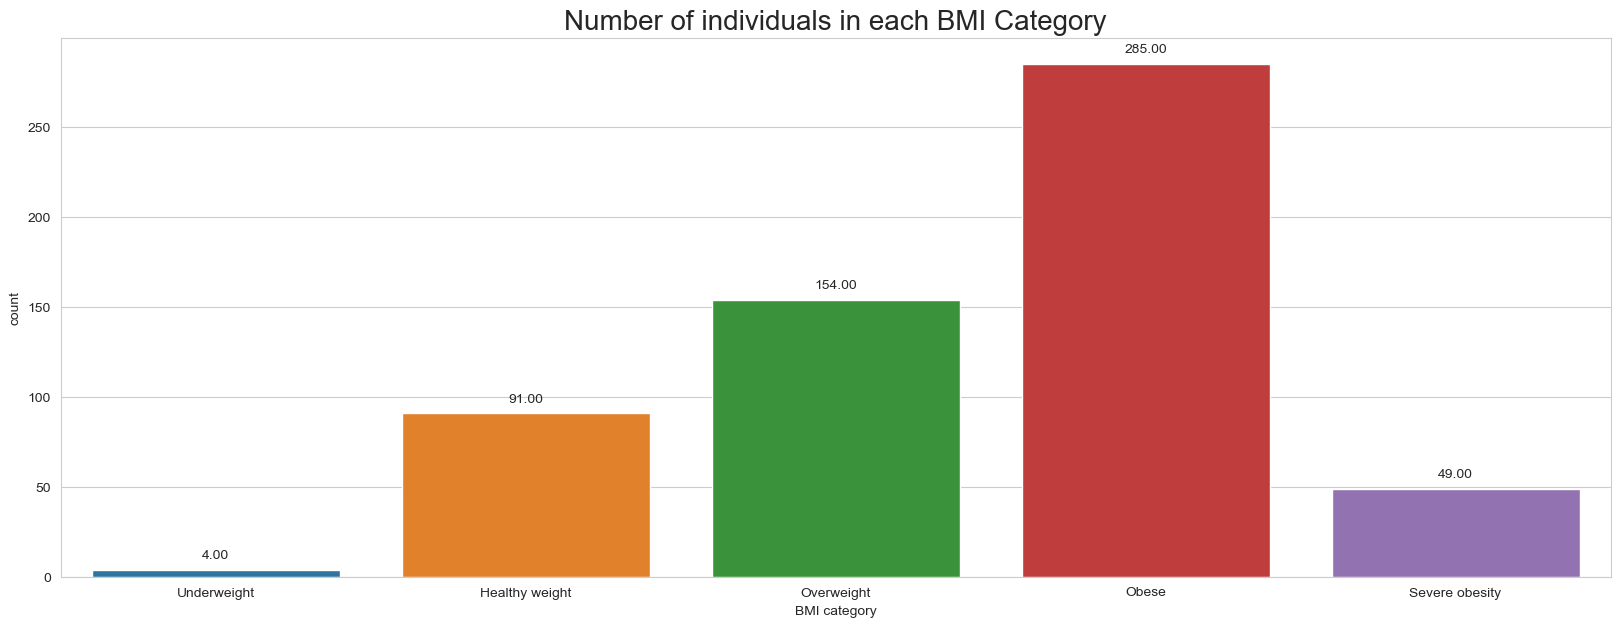

In [248]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (20, 7))

# Plotting the graph using the count plot from seaborn
ax = sns.countplot(data = df, x = 'BMI category', order = ['Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severe obesity'])

# Using a for loop to input the annotations at the top of the bar of the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Adding title
plt.title('Number of individuals in each BMI Category', fontsize = 20)
    
# Display the count chart
plt.show()

### **6. What is the relationship between the blood glucose level category and the outcome of diabetes**

In [249]:
# Define glucose value categories
glucose_categories = {
    'hypoglycemia': (0, 70),
    'normal': (70, 100),
    'hyperglycemia': (100, float('inf'))
}

# Create lambda function to map glucose values to categories
glucose_to_category = lambda glucose: next(category for category, (min_val, max_val) in glucose_categories.items() if glucose >= min_val and glucose < max_val)

# Apply lambda function to glucose values column to convert to categories
df['Glucose category'] = df['Glucose'].apply(glucose_to_category)

# Print the resulting DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group,BMI category,Glucose category
1,1,85.0,66.000000,29.0,49.0,26.6,0.351,31,0,40 years and younger,Overweight,normal
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0,40 years and younger,Overweight,normal
5,5,116.0,74.000000,19.0,105.0,25.6,0.201,30,0,40 years and younger,Overweight,hyperglycemia
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1,40 years and younger,Obese,normal
7,10,115.0,72.405184,40.0,118.0,35.3,0.134,29,0,40 years and younger,Obese,hyperglycemia


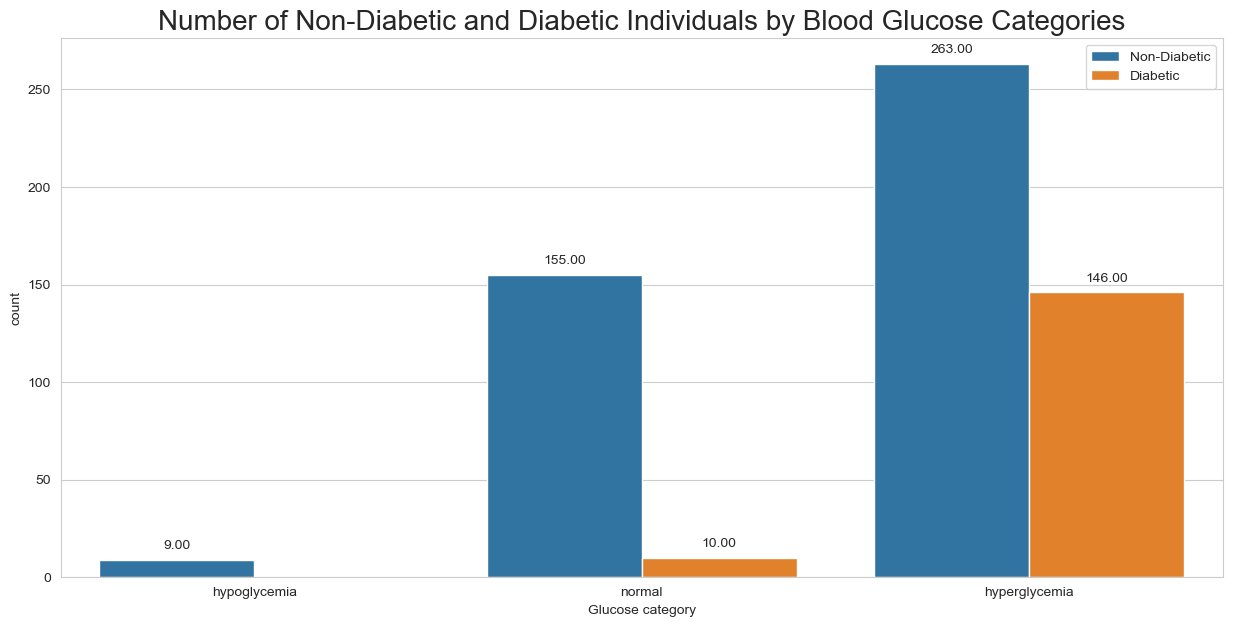

In [250]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (15, 7))

# Plotting the graph using the count plot from seaborn
ax = sns.countplot(data = df, x ='Glucose category', order = ['hypoglycemia', 'normal', 'hyperglycemia'], hue = 'Outcome')

# Using a for loop to input the annotations at the top of the bar of the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Naming the y axis
plt.title('Non-Diabetic and Diabetic count')
    
# Adding a title name
plt.title('Number of Non-Diabetic and Diabetic Individuals by Blood Glucose Categories', fontsize = 20)

# Inputting the legends
plt.legend(['Non-Diabetic', 'Diabetic'])

# Display the count chart
plt.show()

### **7. What is the relationship between the number of pregnancies and the outcome of diabetes**

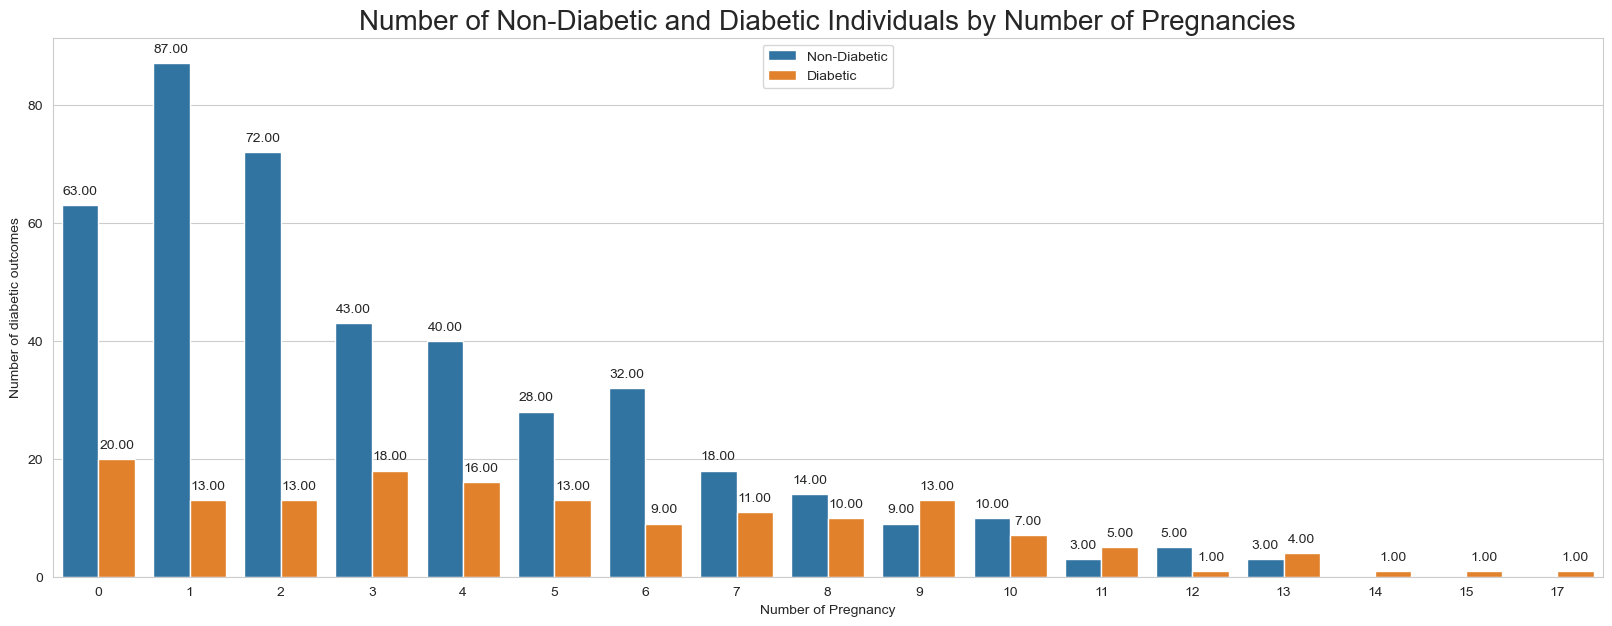

In [251]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (20, 7))

# Plotting the graph using the count plot from seaborn
ax = sns.countplot(data = df, x ='Pregnancies', hue = 'Outcome')

# Using a for loop to input the annotations at the top of the bar of the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Adding a title name
plt.title('Number of Non-Diabetic and Diabetic Individuals by Number of Pregnancies', fontsize = 20)

# Adding x axis
plt.xlabel('Number of Pregnancy')

# Adding y axis
plt.ylabel('Number of diabetic outcomes')

# Inputting the legends
plt.legend(['Non-Diabetic', 'Diabetic'])

# Display the count chart
plt.show()

### **8. What is the Percentage of Diabetics for each Pregnancy count**

C:\Users\User\AppData\Local\Temp\ipykernel_4216\1945598764.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'num_preg': num_preg, 'percent_outcome_1': percent_outcome_1}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4216\1945598764.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'num_preg': num_preg, 'percent_outcome_1': percent_outcome_1}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4216\1945598764.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'num_preg': num_preg, 'percent_outcome_1': percent_outcome_1}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4216\1945598764.py

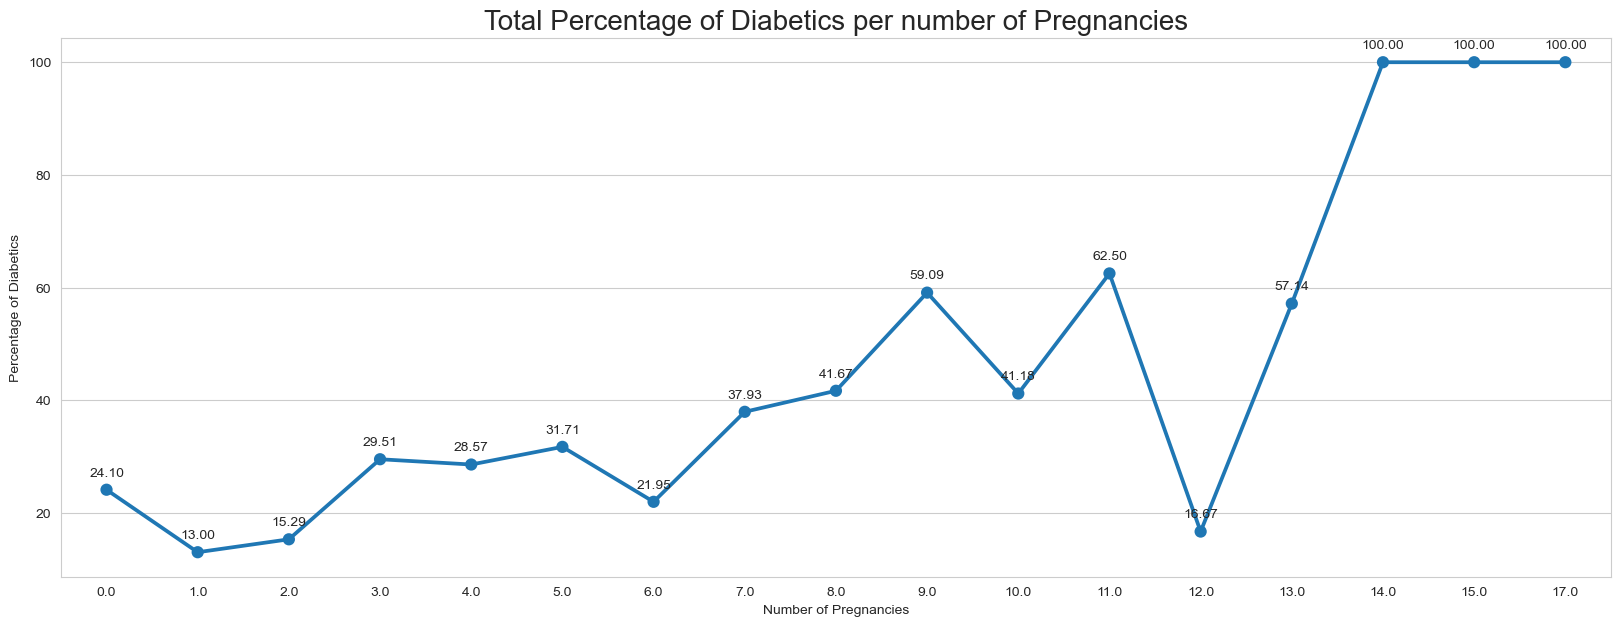

In [252]:
# Adjusting the size of the chart
fig, ax = plt.subplots(figsize = (20, 7))

# Create an empty dataframe to hold the results
result_df = pd.DataFrame(columns=['num_preg', 'percent_outcome_1'])

# Loop through each number of pregnancies, and calculate the percentage of outcome=1
for num_preg in range(0, 18):
    subset = df[df['Pregnancies'] == num_preg]
    num_outcome_1 = len(subset[subset['Outcome'] == 1])
    num_total = len(subset)
    if num_total > 0:
        percent_outcome_1 = 100 * num_outcome_1 / num_total
        result_df = result_df.append({'num_preg': num_preg, 'percent_outcome_1': percent_outcome_1}, ignore_index=True)
    else:
        result_df = result_df.append({'num_preg': num_preg, 'percent_outcome_1': None}, ignore_index=True)

# Dropping the row with null values 
result_df = result_df.dropna()

# Plotting a seaborn pointplot
sns.pointplot(x = "num_preg",
              y = "percent_outcome_1",
              data = result_df)

# Get the current axis
ax = plt.gca()

# Add annotations to each point
for i, point in enumerate(ax.collections):
    for x, y in point.get_offsets():
        ax.annotate('{:.2f}'.format(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

#changing the xlabel
plt.xlabel('Number of Pregnancies')

#changing the ylabel
plt.ylabel('Percentage of Diabetics')

# addingn a title
plt.title('Total Percentage of Diabetics per number of Pregnancies', fontsize = 20)

#Displaying the pointplot
plt.show()

### **STATISTICAL ANALYSIS**

Alpha Value
* 	α = 0.05

> ### **1. Using the diabetes data set, is there an association between BMI and SkinThickness?**

State the hypothesis:

*   $H\_0:$ BMI is not correlated with SkinThickness
*   $H\_1:$ BMI is correlated with SkinThickness

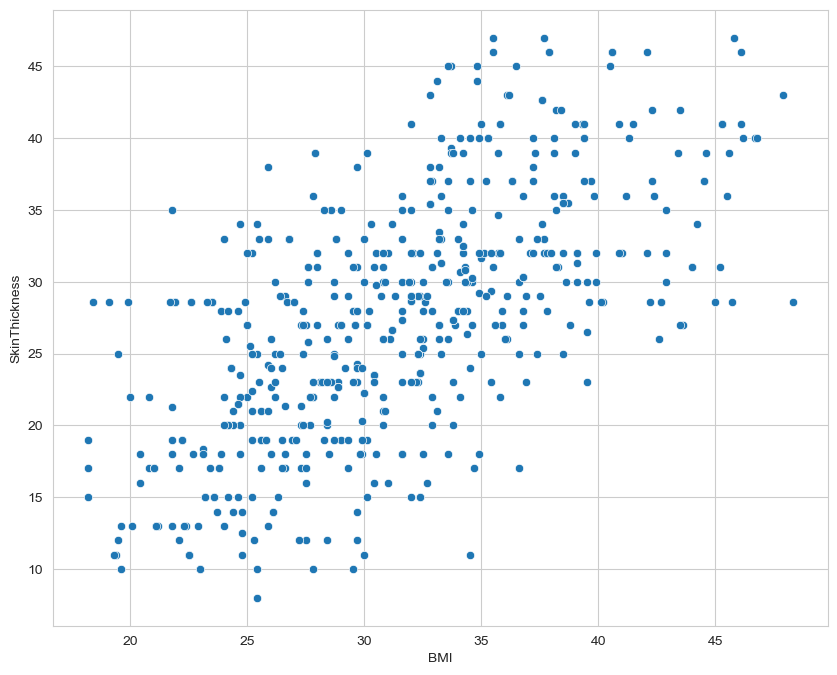

In [253]:
# Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
ax = sns.scatterplot(x="BMI", y="SkinThickness", data=df)

In [254]:
# Using the pearson correlation
scipy.stats.pearsonr(df['BMI'], df['SkinThickness'])

PearsonRResult(statistic=0.6408119469376876, pvalue=1.017332892611303e-68)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between  BMI and SkinThickness.

> ### **2. Using the diabetes data set, is there an association between Glucose blood level and Insulin concentration?**

State the hypothesis:

*   $H\_0:$ Glucose is not correlated with Insulin concentrtation
*   $H\_1:$ Glucose is correlated with Insulin concentrtation

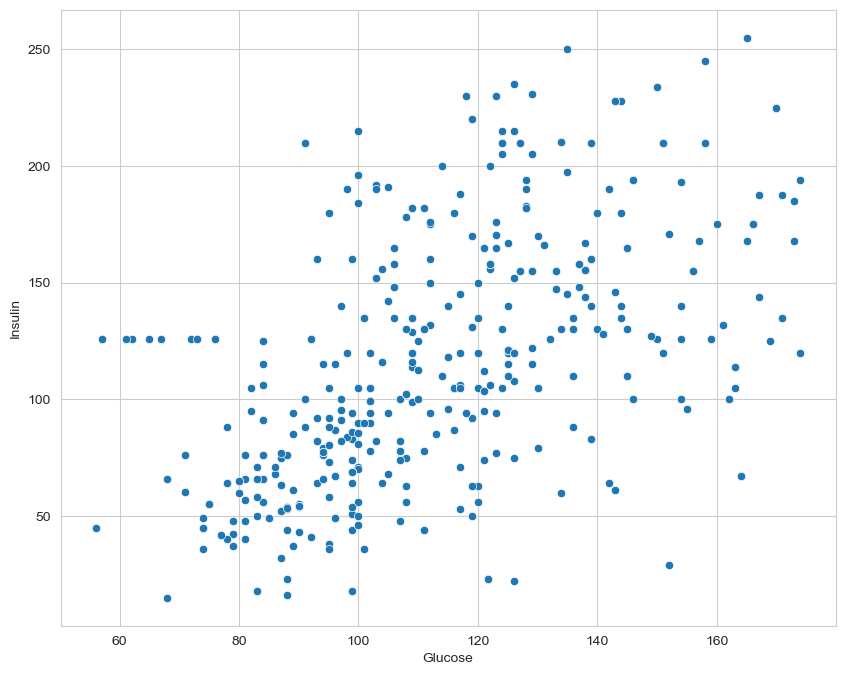

In [255]:
# Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
ax = sns.scatterplot(x="Glucose", y="Insulin", data=df)

In [256]:
# Using the pearson correlation
scipy.stats.pearsonr(df['Glucose'], df['Insulin'])

PearsonRResult(statistic=0.5424694997515396, pvalue=6.4932773396105855e-46)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Blood GLucose Level and Insulin concentration.

> ### **3. Using the diabetes data set, does Glucose Level for subjects differ by age??**

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable:

*   40 years and younger
*   between 40 and 60 years
*   60 years and older

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [257]:
# Test for equality of variance

scipy.stats.levene(df[df['age_group'] == '40 years and younger']['Glucose'],
                   df[df['age_group'] == 'between 40 and 60 years']['Glucose'], 
                   df[df['age_group'] == '60 years and older']['Glucose'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=3.136620143032487, pvalue=0.04416693985465253)

In [258]:
#Separate the three samples (one for each job category) into a variable each.

forty_lower = df[df['age_group'] == '40 years and younger']['Glucose']
forty_sixty = df[df['age_group'] == 'between 40 and 60 years']['Glucose']
sixty_older = df[df['age_group'] == '60 years and older']['Glucose']

In [259]:
# Run a one-way ANOVA.

f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_sixty, sixty_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 7.563216782594948, P-Value: 0.0005720557436667437


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### OBSERVATION FROM DATA EXPLORATION

> 73.2% of the sample population are non diabetic and 26.8% are diabetic.

> Approximately 3 in every 10 person of the sample population are diabetic.

> Obese individuals have the highest chance of being diabetic, while underweight individuals have an almost 0% chance of being diabetic.

> Hyperglycemic individuals have the highest chance of being diabetic, while hypoglycemic individuals have an almost 0% chance of being diabetic.

> There is  positive correlation between the Skin Thickness and BMI

> There is a positive correlation between the Glucose Level and Insulin Concentration in the body

> Where is increase in the number of diabetics as the number of pregnancies increases, but not a steady increase.

# MACHINE LEARNING

> **DATA PREPROCESSING**

1. Feature extraction
2. Feature importance extraction using Random Forest
3. Feature Scaling (Standardization)
4. Splitting data into training and test data

In [260]:
# drop the non-numerical data column

df_sample = df.drop(['BMI category', 'Glucose category', 'age_group'], axis=1)
df_sample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.0,49.0,26.6,0.351,31,0
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,19.0,105.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,40.0,118.0,35.3,0.134,29,0


In [ ]:
pip install imbalanced-learn

In [ ]:
# import libraries 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
## To look for top features using Random Forest
# Create decision tree classifer object

X, y = df_sample.drop('Outcome', axis=1), df_sample['Outcome']
rfc = RandomForestClassifier(random_state=1234, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[10,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=10)
plt.title('Top Features derived by Random Forest', size=10)

In [ ]:
# Getting independent and dependent variables
X, y = df_sample.drop('Outcome', axis=1), df_sample['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify = y)

# Create the scaler and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

> **MODEL TRAINING AND SPLIT**

1. Obtaining best classifier using Cross Validation
2. Handling Class Imbalance with SMOTE and RandomUndersampler (using a pipeline)
3. Fitting model to data (using a pipeline)
4. Testing model performance

In [ ]:
#Cross Validation to obtain best model
models = {'Logistic Regression':LogisticRegression(), 'KNN':KNeighborsClassifier(), 'Decision Tree':DecisionTreeClassifier()}
metrics = []
for model in models.values():
    kf = KFold(n_splits=10, shuffle=True)
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    metrics.append(cv_score)
plt.boxplot(metrics, labels=models.keys())
plt.show()

In [ ]:
# Assuming that X is your feature matrix and y is your target vector
# Instantiate a random under-sampler
rus = RandomUnderSampler(random_state=1234)

# Fit and transform X and y using the random under-sampler
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

# Instantiate a SMOTE
smote = SMOTE(random_state=1234)

# Fit and transform X_resampled and y_resampled using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [ ]:
# Assuming that X_resampled and y_resampled are the balanced feature matrix and target vector
# Instantiate a logistic regression object
logreg = LogisticRegression(random_state=1234)

# Fit the logistic regression model on the balanced dataset
logreg.fit(X_resampled, y_resampled)

# Predict the target vector using the trained model
y_pred = logreg.predict(X_test_scaled)

In [ ]:
#Checking Model Performance
print(classification_report(y_test, y_pred))

In [ ]:
# Visualizing a confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Area Under ROC curve
roc_auc_score(y_test, y_pred)